<a href="https://colab.research.google.com/github/mirckrose/machinelearning-week7/blob/main/Regression_Example_with_XGBRegressor_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [11]:
boston = load_boston()
X, Y = boston.data, boston.target
X_latih, X_tes, Y_latih, Y_tes=train_test_split(X, Y, test_size=0.15)

In [12]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)


In [13]:
xgbr.fit(X_latih, Y_latih)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [14]:
score = xgbr.score(X_latih, Y_latih)  
print("Training score: ", score)

Training score:  0.9697421382780129


In [15]:
scores = cross_val_score(xgbr, X_latih, Y_latih,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.88


In [16]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_latih, Y_latih, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.86


In [17]:
Y_prediksi = xgbr.predict(X_tes)
mse = mean_squared_error(Y_tes, Y_prediksi)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 23.00
RMSE: 4.80


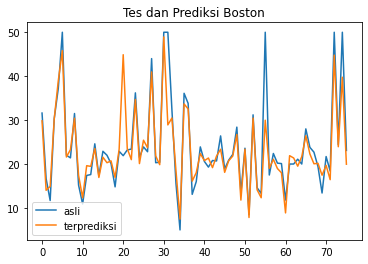

In [18]:
x_ax = range(len(Y_tes))
plt.plot(x_ax, Y_tes, label="asli")
plt.plot(x_ax, Y_prediksi, label="terprediksi")
plt.title("Tes dan Prediksi Boston")
plt.legend()
plt.show()
